In [1]:
import pandas as pd
from darts import TimeSeries
from darts.models import NBEATSModel
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/darts.csv", parse_dates=["date"], index_col="date")

In [3]:
df.head()

,store_nbr,family,sales
date,,,
2013-01-01,1,3,0.0
2013-01-02,1,3,1091.0
2013-01-03,1,3,919.0
2013-01-04,1,3,953.0
2013-01-05,1,3,1160.0


In [4]:
df.tail()

,store_nbr,family,sales
date,,,
2017-08-11,1,3,1006.0
2017-08-12,1,3,1659.0
2017-08-13,1,3,803.0
2017-08-14,1,3,2201.0
2017-08-15,1,3,1942.0


In [5]:
df['sales'] = df['sales'].astype('float32')

In [6]:
series = TimeSeries.from_dataframe(df, value_cols=["sales"], freq='d')

In [7]:
model = NBEATSModel(input_chunk_length=30, output_chunk_length=7, n_epochs=10)

In [8]:
train, val = series.split_before(pd.Timestamp("2017-07-01"))

In [9]:
train.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[   0.]],

       [[1091.]],

       [[ 919.]],

       [[ 953.]],

       [[1160.]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-01-05
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [10]:
model.fit(train)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
24.972    Total estimated model params size (MB)


Training: |                                               | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=30, output_chunk_length=7, n_epochs=10)

In [11]:
prediction = model.predict(len(val))

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                             | 0/? [00:00<?, ?it/s]

In [12]:
prediction

<TimeSeries (DataArray) (date: 46, component: 1, sample: 1)>
array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

...

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2017-07-01 2017-07-02 ... 2017-08-15
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

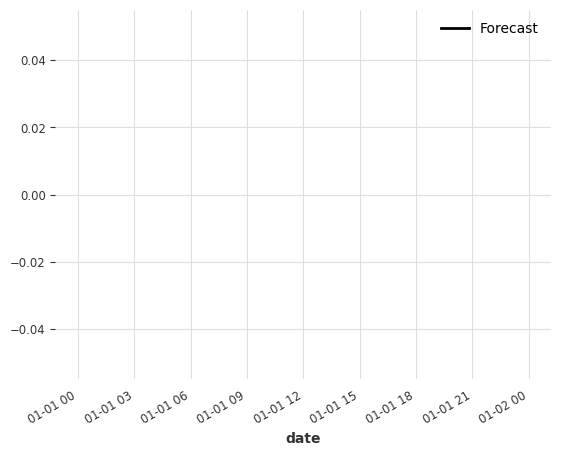

In [13]:
# series.plot(label="Actual")
prediction.plot(label="Forecast")
plt.legend()
plt.show()